In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
def plot_graphs(
    optimizer_losses, 
    optimizer_names, 
    title=None, 
    optimizer_labels=None, 
    save_path=None,
    figsize=(15, 5),
    linewidth=2.0):
    
    
    fig, ax = plt.subplots(figsize=figsize)

    iters = range(1, 201)
    for i, opt_name in enumerate(optimizer_names):
        label = optimizer_labels[i] if optimizer_labels is not None else opt_name # Optimizer label
        ax.plot(iters, losses_array[opt_name].mean(axis=(0,1)), label=label, linewidth=linewidth)

    if title is not None: ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel('Optimization steps', fontsize=16)
    ax.set_ylabel('Loss', fontsize=16)
    ax.set_xlim([1, 201])
    ax.legend(loc='upper right')
    ax.grid()
    ax.legend()
    
    if save_path is not None: fig.savefig(save_path, format='pdf')

def set_opt_titles(opt_name):
    pairs = [
        ('ZO_attack_mnist_', 'LSTM_'),
        ('VarReduced_ZO_attack_mnist', 'VarReducedLSTM_'),
        ('_test20', ''),
        ('scaling3', 'scaling'),
        ('convex100', 'convex')
    ]
    for pair in pairs:
        opt_name = opt_name.replace(*pair)
        
    return opt_name

### Learned ZO-Optimizers

In [18]:
optimizers = [
    # Default models
    'ZO_attack_mnist_test20',
    'VarReduced_ZO_attack_mnist',
    
    # Default models with finite difference
    'ZO_attack_mnist_finite_diff',
    #'VarReduced_ZO_attack_mnist_finite_diff',
    
    # Full precision
    'ZO_attack_mnist_fp32_test20',
    
    # Scaling and convex model
    'ZO_attack_mnist_test20_convex100',
    'ZO_attack_mnist_test20_scaling3',
    'ZO_attack_mnist_test20_scaling3_convex100',
    
    # RNNprop preprocessing
    'ZO_attack_mnist_Prop_test20',
    'ZO_attack_mnist_Prop_test20_scaling3_convex100',
    
    # ADAM preprocessing
    'ZO_attack_mnist_Adam_test20',
]

filenames = [f'nn_opt_loss_array_{i}_q_20.npy' for i in range(1, 11)]

In [19]:
losses = {}
losses_array = {}

for opt in optimizers:
    losses[opt] = []
    for filename in filenames:
        path = os.path.join('../output', opt, filename)
        data = np.load(path)
        losses[opt].append(data.reshape(10, 200))

    losses_array[opt] = np.stack(losses[opt])

### Standard ZO-Optimizers

In [21]:
standard_optimizers = [
    'base_opt',  # ZO-SGD
    'sign_opt',  # ZO-signSGD
    'adam_opt',  # ZO-ADAM
]

filenames = [f'nn_opt_loss_array_{i}_q_20.npy' for i in range(1, 11)]

name_mapping = {
    'base_opt' : 'ZO-SGD',
    'sign_opt' : 'ZO-signSGD',
    'adam_opt' : 'ZO-ADAM'
}



for opt in standard_optimizers:
    name = name_mapping[opt]
    losses[name] = []
    for i in range(1, 11):
        filename = opt + f'_loss_array_{i}_q_20.npy'
        path = os.path.join('../output/VarReduced_ZO_attack_mnist/', filename)
        data = np.load(path)
        losses[name].append(data.reshape(10, 200))

    losses_array[name] = np.stack(losses[name])

### All models

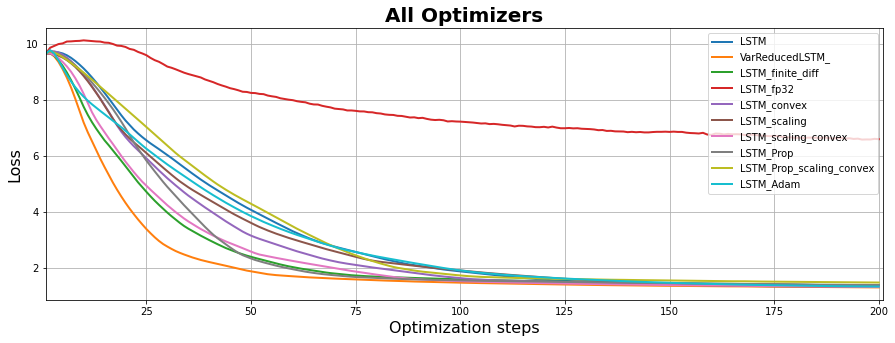

In [22]:
title = 'All Optimizers'
optimizer_names = optimizers
optimizer_labels = [
    set_opt_titles(opt_name)
    for opt_name in optimizer_names
]

plot_graphs(losses_array, optimizer_names, title=title, optimizer_labels=optimizer_labels, save_path=None)

### Learned Optimizer vs Standard Optimizers

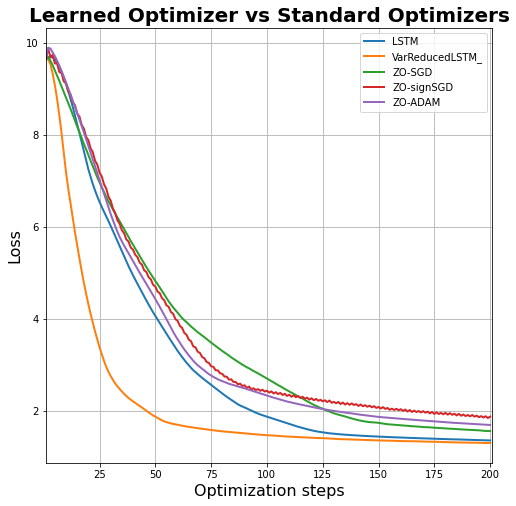

In [23]:
title = 'Learned Optimizer vs Standard Optimizers'
optimizer_names = [
    # Default models
    'ZO_attack_mnist_test20',
    'VarReduced_ZO_attack_mnist',
    
    # Standard Optimizers
    'ZO-SGD',
    'ZO-signSGD',
    'ZO-ADAM'

]
optimizer_labels = [set_opt_titles(opt_name) for opt_name in optimizer_names]

plot_graphs(losses_array, optimizer_names, title=title, optimizer_labels=optimizer_labels, save_path=None, figsize=(8,8))

### The Effect of Finite Difference For Backpropagation 

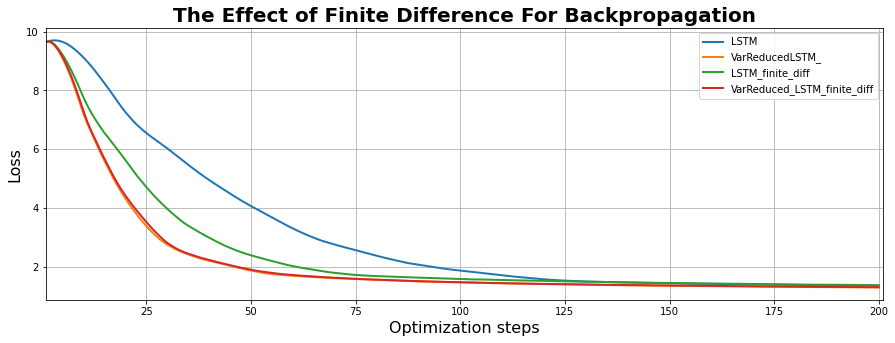

In [89]:
title = 'The Effect of Finite Difference For Backpropagation'
optimizer_names = [
    # Default models
    'ZO_attack_mnist_test20',
    'VarReduced_ZO_attack_mnist',
    
    # Default models with finite difference
    'ZO_attack_mnist_finite_diff',
    'VarReduced_ZO_attack_mnist_finite_diff',
]
optimizer_labels = [set_opt_titles(opt_name) for opt_name in optimizer_names]

plot_graphs(losses_array, optimizer_names, title=title, optimizer_labels=optimizer_labels, save_path=None)

### The Effect of Compute Precision

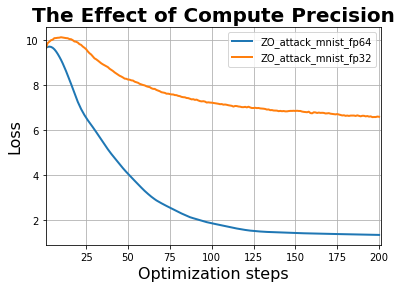

In [24]:
title = 'The Effect of Compute Precision'
optimizer_names = [
    # Default model
    'ZO_attack_mnist_test20',
    
    # Full precision
    'ZO_attack_mnist_fp32_test20',
]
optimizer_labels = [
    'ZO_attack_mnist_fp64', 
    'ZO_attack_mnist_fp32'
]
save_path = '../figures/precision.pdf'
figsize= (6,4)

plot_graphs(losses_array, optimizer_names, title=title, optimizer_labels=optimizer_labels, figsize=figsize, save_path=save_path)

### The Effect of Scaling and Convex Model Regularization

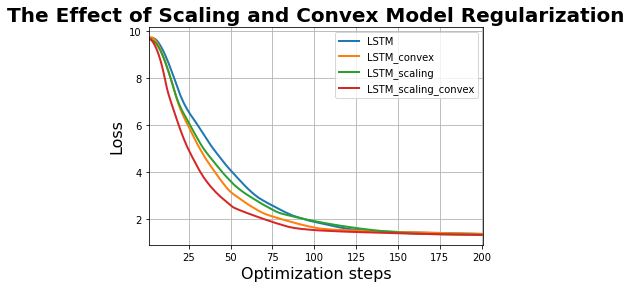

In [25]:
title = 'The Effect of Scaling and Convex Model Regularization'
optimizer_names = [
    # Default models
    'ZO_attack_mnist_test20',
    
    # Scaling and convex model
    'ZO_attack_mnist_test20_convex100',
    'ZO_attack_mnist_test20_scaling3',
    'ZO_attack_mnist_test20_scaling3_convex100',
]
optimizer_labels = [set_opt_titles(opt_name) for opt_name in optimizer_names]

save_path = '../figures/scaling_convex.pdf'
figsize= (6,4)

plot_graphs(losses_array, optimizer_names, title=title, optimizer_labels=optimizer_labels, figsize=figsize, save_path=save_path)

### The Effect of Preprocessing

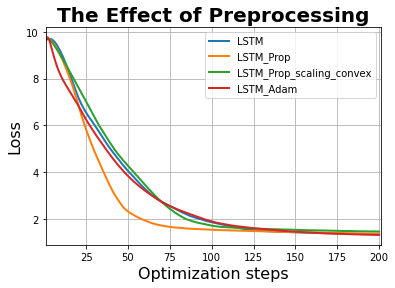

In [26]:
title = 'The Effect of Preprocessing'
optimizer_names = [
    # Default models
    'ZO_attack_mnist_test20',
    
    # RNNprop preprocessing
    'ZO_attack_mnist_Prop_test20',
    'ZO_attack_mnist_Prop_test20_scaling3_convex100',
    
    # ADAM preprocessing
    'ZO_attack_mnist_Adam_test20',
]
optimizer_labels = [set_opt_titles(opt_name) for opt_name in optimizer_names]
save_path = '../figures/preprocessing.pdf'
figsize= (6,4)

plot_graphs(losses_array, optimizer_names, title=title, optimizer_labels=optimizer_labels, figsize=figsize, save_path=save_path)

### The Effect of Preprocessing, Scaling and Convex Model Regularization on Generalization

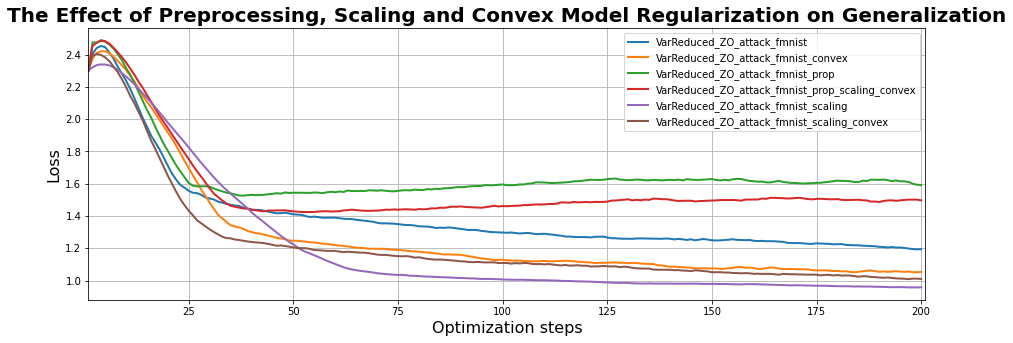

In [5]:
title = 'The Effect of Preprocessing, Scaling and Convex Model Regularization on Generalization'
optimizer_names = [
    # Default models
    'VarReduced_ZO_attack_fmnist',
    
    # Scaling and convex model
    'VarReduced_ZO_attack_fmnist_convex100',
    'VarReduced_ZO_attack_fmnist_prop',
    'VarReduced_ZO_attack_fmnist_prop_scaling3_convex100',
    "VarReduced_ZO_attack_fmnist_scaling3",
    "VarReduced_ZO_attack_fmnist_scaling3_convex100"
]
optimizer_labels = [set_opt_titles(opt_name) for opt_name in optimizer_names]
filenames = [f'nn_opt_loss_array_{i}_q_20.npy' for i in range(1, 2)]

losses = {}
losses_array = {}

for opt in optimizer_names:
    losses[opt] = []
    for filename in filenames:
        path = os.path.join('../output', opt, filename)
        data = np.load(path)
        losses[opt].append(data.reshape(10, 200))

    losses_array[opt] = np.stack(losses[opt])

plot_graphs(losses_array, optimizer_names, title=title, optimizer_labels=optimizer_labels, save_path=None)